### Load and Explore data files

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
directory = "../../data_files/"

Loading the production log file

In [3]:
prod = pd.read_csv(directory + 'production_log.csv')

In [4]:
prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1656 entries, 0 to 1655
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1656 non-null   int64 
 1   timestamp   1656 non-null   object
 2   product_id  1656 non-null   object
dtypes: int64(1), object(2)
memory usage: 38.9+ KB


In [5]:
prod.head()

,Unnamed: 0,timestamp,product_id
0,0,2021-05-17_08-12-48,P3.2.500
1,1,2021-05-17_08-12-51,P3.2.501
2,2,2021-05-17_08-12-54,P3.2.502
3,3,2021-05-17_08-12-57,P3.2.503
4,4,2021-05-17_08-13-00,P3.2.504


Each timestamp is associated with a vibration data file, containing measurements of 1 sec for two sensors with 20480 data points.

In [6]:
# Loading a vibration data file
path = directory + 'vibrationdata/'
filename = os.listdir(path)[0]

In [7]:
print(filename)

2021-05-17_08-42-57


In [8]:
df = pd.read_csv(os.path.join(path, filename), sep='\t', names = ['Sensor 1', 'Sensor 2'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20480 entries, 0 to 20479
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sensor 1  20480 non-null  float64
 1   Sensor 2  20480 non-null  float64
dtypes: float64(2)
memory usage: 320.1 KB


In [10]:
df

,Sensor 1,Sensor 2
0,-0.107,-0.090
1,-0.105,-0.029
2,-0.017,-0.085
3,-0.059,-0.110
4,0.017,-0.078
...,...,...
20475,0.002,-0.049
20476,-0.215,-0.005
20477,-0.396,-0.227
20478,-0.232,0.042


#### Plotting sensor data

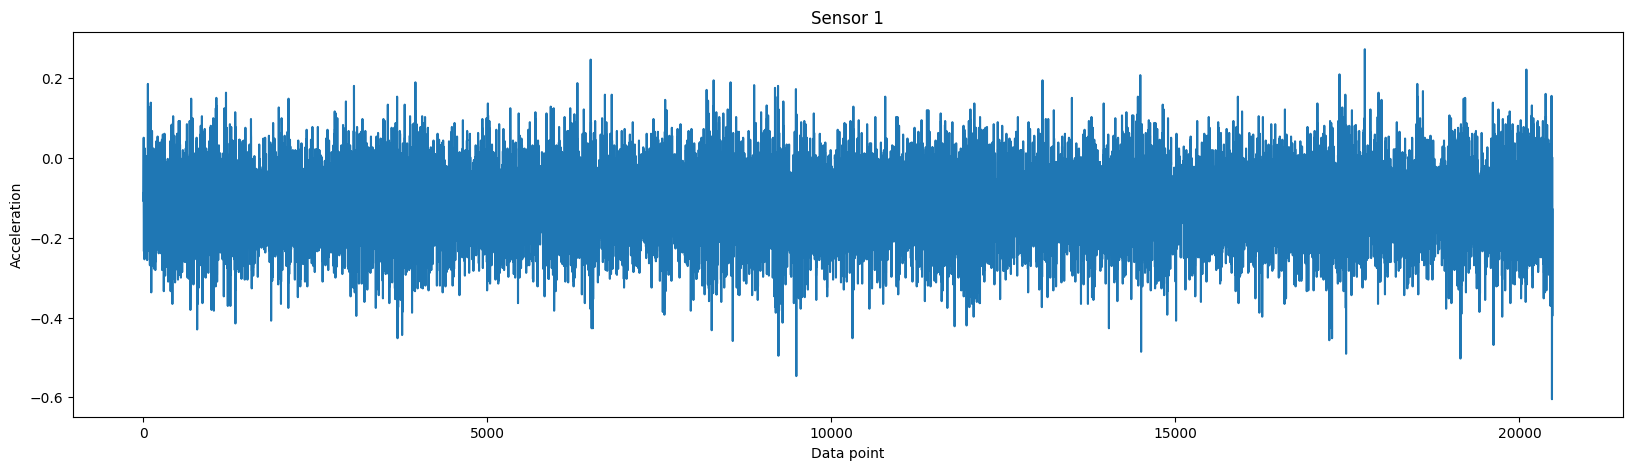

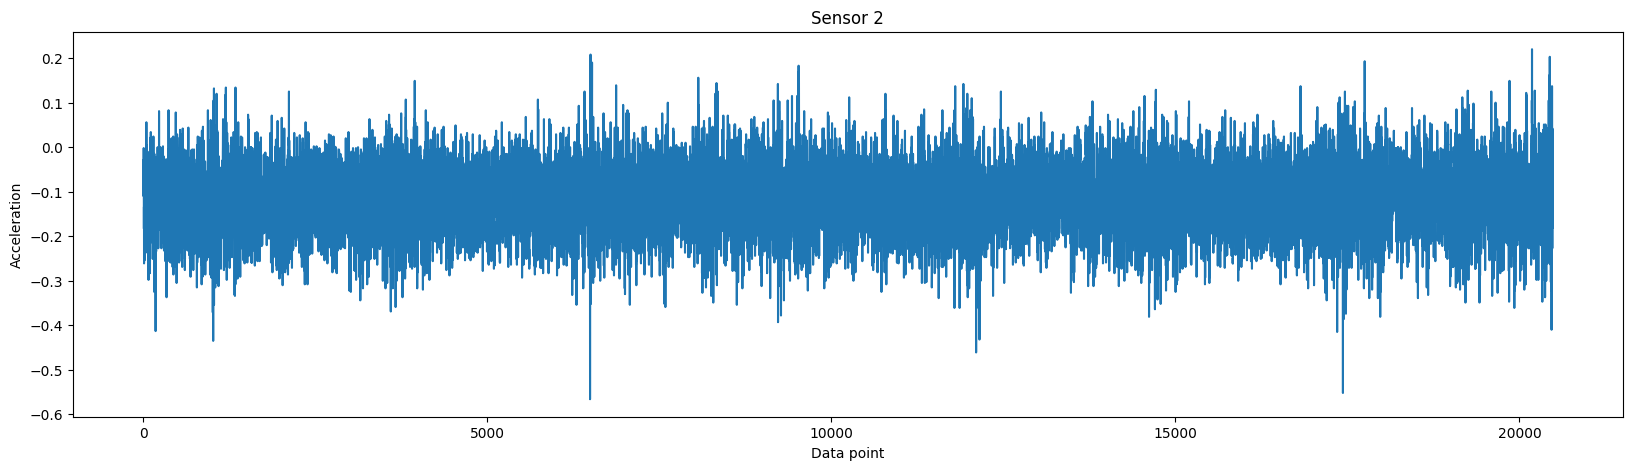

In [11]:
plt.figure(figsize=(20, 5))
plt.xlabel("Data point")
plt.ylabel("Acceleration")
plt.title("Sensor 1")
plt.plot(df["Sensor 1"])
plt.show()

plt.figure(figsize=(20, 5))
plt.xlabel("Data point")
plt.ylabel("Acceleration")
plt.title("Sensor 2")
plt.plot(df["Sensor 2"])
plt.show()

Loading the product quality log file

In [12]:
quality = pd.read_csv(directory + 'product_quality_log.csv')

In [13]:
quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1656 entries, 0 to 1655
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1656 non-null   int64 
 1   machine_id  1656 non-null   object
 2   product_id  1656 non-null   object
 3   quality     1656 non-null   object
dtypes: int64(1), object(3)
memory usage: 51.9+ KB


In [14]:
quality

,Unnamed: 0,machine_id,product_id,quality
0,0,Printer F0815,P3.2.500,OK
1,1,Printer F0815,P3.2.501,OK
2,2,Printer F0815,P3.2.502,OK
3,3,Printer F0815,P3.2.503,OK
4,4,Printer F0815,P3.2.504,OK
...,...,...,...,...
1651,1651,Printer F0815,P3.2.2151,nOK
1652,1652,Printer F0815,P3.2.2152,nOK
1653,1653,Printer F0815,P3.2.2153,nOK
1654,1654,Printer F0815,P3.2.2154,nOK


#### Plotting class distribution

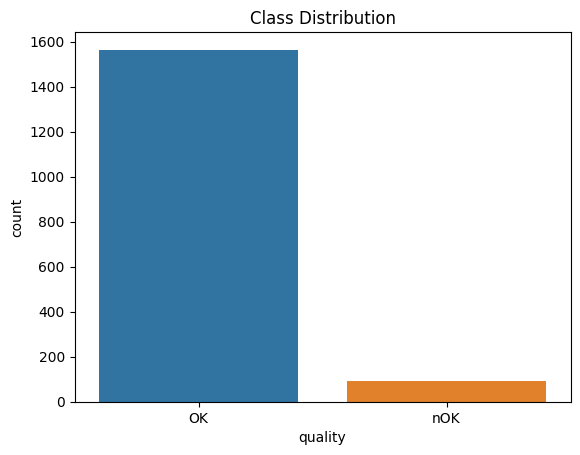

In [15]:
sns.countplot(x=quality['quality'])
plt.title('Class Distribution')
plt.show()

In [16]:
print('Count for OK: ',quality['quality'].value_counts()['OK'])
print('Count for nOK: ',quality['quality'].value_counts()['nOK'])

Count for OK:  1564
Count for nOK:  92


We observe that the count for OK datapoints are much higher compared to nOK. So, that the dataset is imbalanced. 